In [ ]:
!pip install scikit-learn

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import json

In [15]:
data = pd.read_csv("data.csv",index_col="#")
test_res = pd.read_csv("test_res.csv")

In [16]:
removed_files = []
for name, file in zip(list(test_res["API"]),list(test_res["FILE_#"])):
    removed_files.append(name.lower()+"_"+str(file))
removed_files = set(removed_files) 

for index, row in data.iterrows():
    file = row['API'].lower()+"_"+str(row['API_CODE_#'])
    if file in removed_files:
        data = data.drop(index)

In [17]:
data["CODE"] = ""
for index, row in data.iterrows():
    code_path = row['CODE_PATH']
    with open(code_path) as f: data.at[index,"CODE"] = f.read()

In [18]:
grouped = data.groupby('API')

In [40]:
merge_df = pd.DataFrame()
for category, group in grouped:
    if len(group)>7:
        train_df, test_df = train_test_split(group, test_size=0.1, random_state=42)
        train_df["SPLIT"] = "train" 
        test_df["SPLIT"] = "test" 
        merge_df = pd.concat([merge_df ,train_df, test_df])
    else:
        group["SPLIT"] = "test" 
        merge_df = pd.concat([merge_df, group])

merge_df

,API,API_CODE_#,INSTRUCT,CODE_PATH,TEST_1,TEST_2,TEST_3,TEST_4,TEST_5,CODE,SPLIT
#,,,,,,,,,,,
1228,PyDrive2,39,Create a Python program that empties the trash...,code/PyDrive2/PyDrive2_39.py,Test if the program permanently deletes all fi...,Test if the program handles authentication err...,NaN,NaN,NaN,#!pip install pydrive2\nfrom pydrive2.auth imp...,train
1213,PyDrive2,24,Create a Python program that shares a folder o...,code/PyDrive2/PyDrive2_24.py,Test if the program handles the case when the ...,Test if the program shares the folder with the...,Test if the program handles authentication err...,NaN,NaN,#!pip install pydrive2\nfrom pydrive2.auth imp...,train
1199,PyDrive2,10,Create a Python program that searches for file...,code/PyDrive2/PyDrive2_10.py,Test if the program lists the files that match...,Test if the program handles authentication err...,Test if the program handles the case when no f...,NaN,NaN,#!pip install pydrive2\nfrom pydrive2.auth imp...,train
1215,PyDrive2,26,Create a Python program that lists all folders...,code/PyDrive2/PyDrive2_26.py,Test if the program lists the folders in the s...,Test if the program handles authentication err...,Test if the program handles the case when the ...,NaN,NaN,#!pip install pydrive2\nfrom pydrive2.auth imp...,train
1191,PyDrive2,2,Create a Python program that uploads a file to...,code/PyDrive2/PyDrive2_2.py,Test if the program handles the case when the ...,Test if the program handles authentication err...,Test if the program handles the case when the ...,NaN,NaN,#!pip install pydrive2\nfrom pydrive2.auth imp...,train
...,...,...,...,...,...,...,...,...,...,...,...
1977,ydata-profiling,9,Create a Python program that utilizes the 'yda...,code/ydata-profiling/ydata-profiling_9.py,Ensure that the profiling report includes data...,Verify that the data is successfully loaded fr...,"Check if the ""url_excel_profile.json"" file is ...",NaN,NaN,#! pip install ydata-profiling\nimport pandas ...,train
1973,ydata-profiling,5,Create a Python program that utilizes the 'yda...,code/ydata-profiling/ydata-profiling_5.py,Verify that the data is successfully loaded fr...,Confirm that the profiling report contains bas...,"Check if the ""url_data_profile.json"" file is c...",NaN,NaN,#! pip install ydata-profiling\nimport pandas ...,train
1976,ydata-profiling,8,Create a Python program that uses the 'ydata-p...,code/ydata-profiling/ydata-profiling_8.py,Ensure that the SQLite database connection to ...,"Check if the ""sqlite_db_profile.pdf"" file is c...",Confirm that the profiling reports include a l...,NaN,NaN,#! pip install ydata-profiling\nimport sqlite3...,train


In [41]:
# Split count
value_counts = merge_df['SPLIT'].value_counts()
print(value_counts)

train    811
test     124
Name: SPLIT, dtype: int64


In [42]:
merge_df.to_csv("data_v1.csv", index=False)

In [2]:
data = pd.read_csv("data_v1.csv")
with open("../../Documentation Data.json", 'r', encoding='utf-8') as json_file:
        documentation_data = json.load(json_file)

In [5]:
data = data.applymap(str)
train_df = data[data["SPLIT"]=="train"]
test_df = data[data["SPLIT"]=="test"]
x_train_list = []
x_test_list = []

for a,i,j in zip(train_df["API"],train_df["INSTRUCT"],train_df["CODE"]):
    x_train_list.append({
        "instruction" : i,
        "api": a,
        "input":documentation_data[a],
        "output": j
    })
    
for a,i,j in zip(test_df["API"], test_df["INSTRUCT"],test_df["CODE"]):
    x_test_list.append({
        "instruction" : i,
        "api": a,
        "input": documentation_data[a],
        "output": j
    })

import json
with open('data_train.json', 'w', encoding='utf-8') as f:
    json.dump(x_train_list, f, ensure_ascii=False, indent=4)
with open('data_test.json', 'w', encoding='utf-8') as f:
    json.dump(x_test_list, f, ensure_ascii=False, indent=4)

In [19]:
data = pd.read_csv("data_v1.csv")
with open("../../Documentation Data.json", 'r', encoding='utf-8') as json_file:
        documentation_data = json.load(json_file)

data = data.applymap(str)
train_df = data[data["SPLIT"]=="train"]
print("Number of Train dataset",len(train_df))
test_df = data[data["SPLIT"]=="test"]
print("Number of Train dataset",len(test_df))

counts_api = {}

data_api_count = {}
        
for api in data["API"]:
    if api in data_api_count.keys():
        data_api_count[api]+=1
    else:
        data_api_count[api]=1
    counts_api[api] = {}    
    counts_api[api]["train"] = 0
    counts_api[api]["test"] = 0



for api in train_df["API"]:
    counts_api[api]['train']+=1

for api in test_df["API"]:
    counts_api[api]['test']+=1
    

Number of Train dataset 811
Number of Train dataset 124


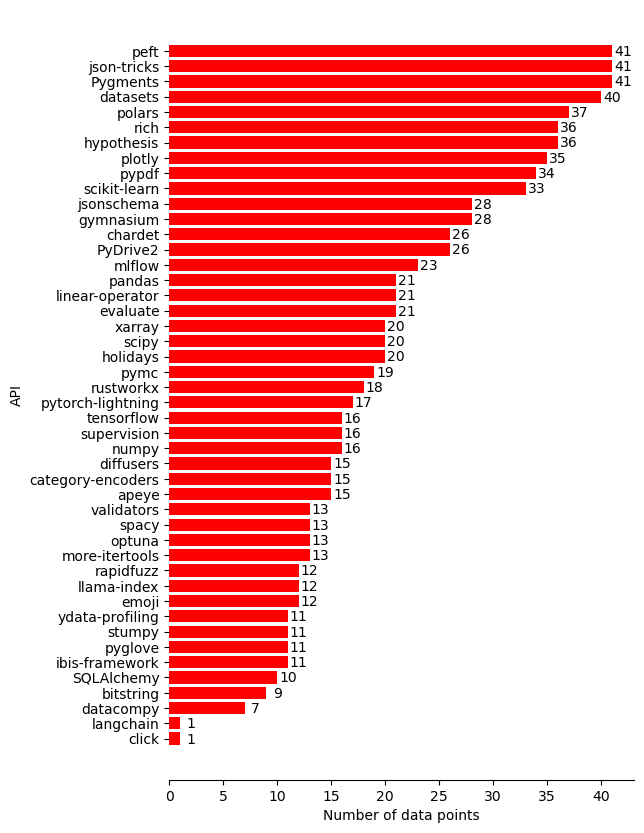

In [20]:
import matplotlib.pyplot as plt
sorted_data = sorted(zip(data_api_count.keys(), data_api_count.values()), key=lambda x: x[1])
apis = [x[0] for x in sorted_data]
files_Nums = [x[1] for x in sorted_data]

plt.figure(figsize=(6, 10))
bars = plt.barh(apis, files_Nums, color='red')
plt.xlabel('Number of data points')
plt.ylabel('API')


plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True


for bar, count in zip(bars, files_Nums):
    plt.text( bar.get_width() + 1, bar.get_y()-0.1, str(count),
             ha='center', va='bottom')


plt.show()

In [18]:
counts_api

{'PyDrive2': {'train': 23, 'test': 3},
 'Pygments': {'train': 36, 'test': 5},
 'SQLAlchemy': {'train': 9, 'test': 1},
 'apeye': {'train': 13, 'test': 2},
 'bitstring': {'train': 8, 'test': 1},
 'category-encoders': {'train': 13, 'test': 2},
 'chardet': {'train': 23, 'test': 3},
 'click': {'train': 0, 'test': 1},
 'datacompy': {'train': 0, 'test': 7},
 'datasets': {'train': 36, 'test': 4},
 'diffusers': {'train': 13, 'test': 2},
 'emoji': {'train': 10, 'test': 2},
 'evaluate': {'train': 18, 'test': 3},
 'gymnasium': {'train': 25, 'test': 3},
 'holidays': {'train': 18, 'test': 2},
 'hypothesis': {'train': 32, 'test': 4},
 'ibis-framework': {'train': 9, 'test': 2},
 'json-tricks': {'train': 36, 'test': 5},
 'jsonschema': {'train': 25, 'test': 3},
 'langchain': {'train': 0, 'test': 1},
 'linear-operator': {'train': 18, 'test': 3},
 'llama-index': {'train': 10, 'test': 2},
 'mlflow': {'train': 20, 'test': 3},
 'more-itertools': {'train': 11, 'test': 2},
 'numpy': {'train': 14, 'test': 2},
 

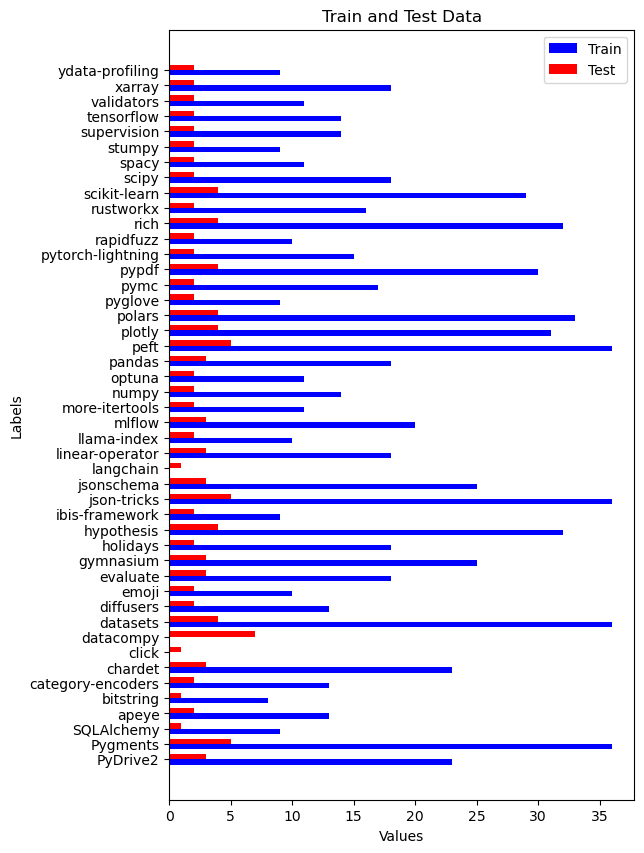

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting labels and values
labels = list(counts_api.keys())
train_values = [counts_api[label]["train"] for label in labels]
test_values = [counts_api[label]["test"] for label in labels]

# Width of the bars
bar_width = 0.35

# Position of bars on x-axis
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]
plt.figure(figsize=(6, 10))

# Plotting
plt.barh(r1, train_values, color='b', height=bar_width, label='Train')
plt.barh(r2, test_values, color='r', height=bar_width, label='Test')

# Add labels
plt.xlabel('Values')
plt.ylabel('Labels')
plt.title('Train and Test Data')
plt.yticks([r + bar_width / 2 for r in range(len(labels))], labels)
plt.legend()

plt.show()

## Add Langchain to the test dataset

In [27]:
import json

with open("../../Documentation Data.json", 'r', encoding='utf-8') as json_file:
        documentation_data = json.load(json_file)

langchain_docu = documentation_data["langchain"] 

with open("./data_test.json", 'r', encoding='utf-8') as json_file:
        test_data = json.load(json_file)

with open("./added_langchain_test.json", 'r', encoding='utf-8') as json_file:
        added_langchain_test = json.load(json_file)

for data in added_langchain_test:
    data["input"] = langchain_docu
    test_data.append(data)

with open('data_test.json', 'w', encoding='utf-8') as f:
    json.dump(test_data, f, ensure_ascii=False, indent=4)